In [1]:
## poisson approximation in rideshare profit and loss study
## trip is between Toledo Airport and Downtown Toledo and study length of 12 months
## real life data of whether price was accepted by a rider
## budget per month is $30 * 1000 = $30000 or $3 x 10^4, how to make most 
# Import necessary libraries
!pip install nbconvert
!pip install --upgrade pip
## for printing to .pdf
!pip install pylatex
!pip install seaborn
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
from pandas import DataFrame
%matplotlib inline
# warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# instances from real-life rideshare 
df_train = pd.read_csv("driverAcceptanceData - driverAcceptanceData.csv", index_col=[0])


In [2]:
df_train = DataFrame(df_train)
df_train.info()
df_train.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PAY       1000 non-null   float64
 1   ACCEPTED  1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.4 KB


(1000, 2)

In [3]:
# Missing values
df_train.isnull().mean().sort_values(ascending=False)

PAY         0.0
ACCEPTED    0.0
dtype: float64

In [4]:
# list(data) or
list(df_train.columns)

['PAY', 'ACCEPTED']

In [5]:
df_train.describe()


,PAY,ACCEPTED
count,1000.000000,1000.00000
mean,25.713530,0.52700
std,10.051410,0.49952
min,0.000000,0.00000
25%,18.878792,0.00000
50%,25.483059,1.00000
75%,32.825641,1.00000
max,53.667563,1.00000


In [7]:
# commonalities in value, cardinality
df_train.nunique().sort_values(ascending=False)

PAY         995
ACCEPTED      2
dtype: int64

In [8]:
# Python program to check if two
# to get unique values from list
# importing counter from collections
 
from collections import Counter
 
# Function to get unique values
 
 
def unique(list1):
 
    # Print directly by using * symbol
    print(*Counter(list1))
 
 
# driver code
list1 = df_train['PAY']
print("the unique values from 1st list is")
unique(list1)
 

the unique values from 1st list is
29.35873226 22.98684655 18.02034841 45.73071708 14.64284475 24.98563479 26.39212506 32.02364209 38.29520952 27.75353508 30.69963888 44.00636724 50.57676028 21.40083667 43.07691305 34.32244582 25.43402197 10.87001806 42.01674729 24.15650811 24.46670721 19.60796775 20.67048409 24.17216338 12.56868652 24.40603213 52.1948532 25.80282687 26.93989283 25.46797509 14.7134849 34.72586591 25.84144123 34.10778275 25.14187856 21.74069353 7.773128548 18.65290476 14.34751343 28.30114995 12.64329153 29.80563459 19.63213514 20.57130376 20.02714083 28.67359628 27.34137882 23.17391776 23.8121645 23.030398 37.58153798 14.12631944 33.18522583 45.98465265 7.470608023 25.0596449 23.82066586 22.79519197 20.74014736 31.76698198 18.8096002 23.37179174 0.0 37.05720839 30.75074574 25.59679197 20.67378486 21.96007878 30.07910453 32.22000468 22.88182355 28.52878487 8.296113505 26.60396691 10.37909725 32.29454873 16.34873239 19.10583862 33.8016996 14.96109418 9.430115575 14.060505

In [9]:
df_train.groupby('ACCEPTED').count()



,PAY
ACCEPTED,
0,473
1,527


In [10]:
# mean for pay is $25.71 and the max was $53.66
# mean acceptance rate is 0.527 or 52.7%

#There are 10,000 riders in Toledo, but you can’t acquire more than 1,000 in a given month. You start with 0 riders.
# “Acquisition” means that the rider has downloaded the app and may request rides. Requested rides may or may not be 
# accepted by a driver. In the first month that riders are active, they request rides based on a Poisson distribution
# where lambda = 1. For each subsequent month, riders request rides based on a Poisson distribution where lambda is 
# the number of rides that they found a match for in the previous month. (As an example, a rider that requests 3 rides
# in month 1 and finds 2 matches has a lambda of 2 going into month 2.) If a rider finds no matches in a month (which
# may happen either because they request no rides in the first place based on the Poisson distribution or because 
# they request rides and find no matches), they leave the service and never return.

# First month
# Note do not use lambda as an object name in python! It is already used for special lambda functions in Python!!

# time period is 1 month (first month)
# from scipy.stats import poisson

#generate random values from Poisson distribution with mean=1 and sample size=10000
# poisson.rvs(mu=1, size=10000)



# Import the dsitrubtion from scipy.stats
# poisson model with lamda 1 first month and the next month 10,000 riders request rides that got one the 
# previous month
# instances for poison model
# k = np.arrange(0, 10000)
# print(k)
# pmf = poisson.pmf(k, mu=1)
# pmf = np.round(pmf, 5)
# print(pmf)


(array([0.63      , 0.605     , 0.        , 0.29666667, 0.        ,
        0.10666667, 0.025     , 0.        , 0.00166667, 0.00166667]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

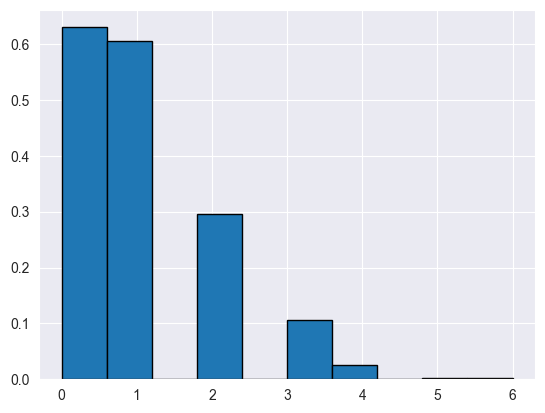

In [11]:
# distribution of getting rides for each 10000 riders in the first month
from scipy.stats import poisson
import matplotlib.pyplot as plt

#generate Poisson distribution with sample size 10000
x = poisson.rvs(mu=1, size=1000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

In [12]:
# instances for poison model
# initiate for all month 1 and month 2 and n+1 months of original 1000
k = np.arange(0, 1000)
x = DataFrame(x)
k = DataFrame(k)
df_x = pd.merge(k, x, how='inner')



In [13]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [14]:
df_x.head(6)


,0
0,0
1,0
2,0
3,0
4,0
5,0


In [15]:
df_x.describe()

,0
count,1000.000000
mean,0.982000
std,0.994316
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,6.000000


In [16]:
# list(data) or
list(df_x.columns)

[0]

In [17]:
df_x.rename( columns={0:'NumRides'}, inplace=True )

In [18]:
# list(data) or
list(df_x.columns)

['NumRides']

In [24]:
# based on poisson dist it will return values from index 0 - 5, 6 also possible, 7? account for any possibility
# class for poisson and indexes, where the number of rides given may go up to
# higher than that number, e.g.
#    NumRides
#0    373
#1    361
#2    177
#3     72
#4     16
#7      1
# df_x.groupby('label', sort=True)['data'].apply(pd.Series.tolist).tolist()
# ridercount = df_x.groupby('NumRides').groups.keys
# numriders  = df_x.groupby('NumRides').groups.values
# df_riders = pd.merge(ridercount, numriders, how='inner')

# change name from 'size' to 'RideCount'
numriders = DataFrame(df_x.groupby('NumRides').size().to_frame('RideCount')).reset_index()
print(numriders)

# print(df_x.groupby('NumRides').size())

   NumRides  RideCount
0         0        378
1         1        363
2         2        178
3         3         64
4         4         15
5         5          1
6         6          1


In [25]:
list(numriders.columns)

['NumRides', 'RideCount']

In [26]:
# numriders.rename( columns={'size':'NumRiders'}, inplace=True )

In [27]:
numriders.shape


(7, 2)

In [28]:
numriders.head(6)

,NumRides,RideCount
0,0,378
1,1,363
2,2,178
3,3,64
4,4,15
5,5,1


In [29]:
numriders.iloc[5].NumRides

5

In [30]:
numriders.iloc[5].RideCount 

1

In [34]:
# first month hire a 1000 riders at a cost of $30/rider
# cost of $30000 for the first month
# month 1 gross below

# income for first month
income_sum = 0
charge_rider = 30
for i in range(5):
    income_sum += numriders.iloc[i].NumRides*charge_rider*numriders.iloc[i].RideCount  
    
    
print('Gross USD ', income_sum)

Gross USD  29130


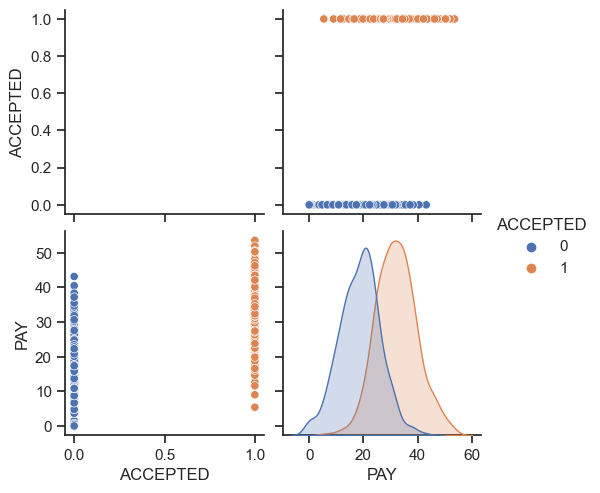

In [35]:
# trends in accepted rides and cost
sns.set_theme(style="ticks")

sns.pairplot(df_train, vars = ["ACCEPTED", "PAY"],hue ='ACCEPTED')


<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

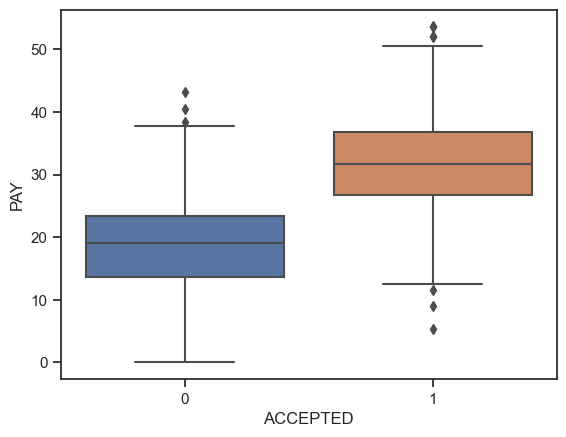

In [36]:
sns.boxplot(data=df_train, x=df_train["ACCEPTED"], y=df_train["PAY"])

<AxesSubplot: >

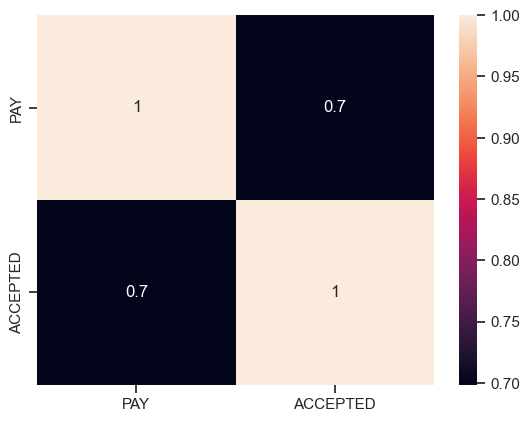

In [37]:
## heatmap for visualization
sns.heatmap(df_train.corr(method='spearman'), annot=True)

(array([[0.00262176, 0.00936343, 0.02059955, 0.03052479, 0.03932641,
         0.03370835, 0.0280903 , 0.01385788, 0.0059926 , 0.00224722],
        [0.18614502, 0.00018727, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]]),
 array([ 0.        ,  5.36675632, 10.73351264, 16.10026895, 21.46702527,
        26.83378159, 32.20053791, 37.56729423, 42.93405054, 48.30080686,
        53.66756318]),
 <a list of 2 BarContainer objects>)

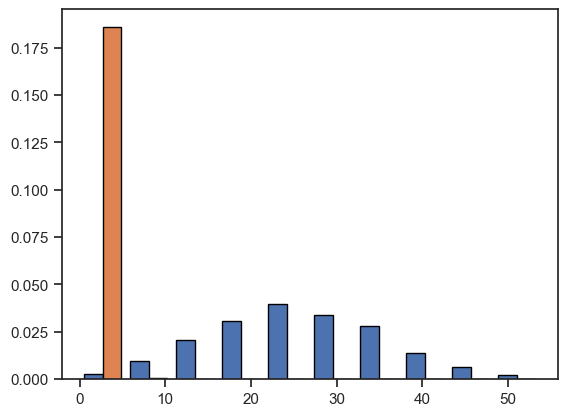

In [38]:
# Group by PAY and ACCEPTED on training 'real' data

plt.hist(df_train.groupby('PAY').count().sort_values('ACCEPTED',ascending=False).rename(columns={"ACCEPTED" : "PRICE MOST ACCEPTED"}).reset_index()  , density=True, edgecolor='black')

In [39]:
# Price for Accepted rides
paid = DataFrame(df_train.loc[df_train['ACCEPTED'] == 1, 'PAY'])
paid.shape



(527, 1)

(array([0.00259486, 0.        , 0.        , 0.        , 0.00259486,
        0.        , 0.        , 0.        , 0.00259486, 0.00518972,
        0.        , 0.        , 0.00259486, 0.00259486, 0.00518972,
        0.00259486, 0.00518972, 0.00518972, 0.01816401, 0.00518972,
        0.01556915, 0.01297429, 0.02075887, 0.02335373, 0.01816401,
        0.04151774, 0.0441126 , 0.05189717, 0.0441126 , 0.0441126 ,
        0.03892288, 0.04151774, 0.04670745, 0.05449203, 0.08563033,
        0.04151774, 0.03373316, 0.04670745, 0.05968175, 0.05449203,
        0.06487147, 0.03373316, 0.05449203, 0.03892288, 0.02594859,
        0.03892288, 0.03373316, 0.03632802, 0.01556915, 0.01297429,
        0.01556915, 0.01037943, 0.01556915, 0.01297429, 0.00778458,
        0.01816401, 0.01037943, 0.00518972, 0.01037943, 0.        ,
        0.00259486, 0.01297429, 0.        , 0.00518972, 0.        ,
        0.00518972]),
 array([ 5.40397316,  6.13523968,  6.86650619,  7.59777271,  8.32903923,
         9.06030574, 

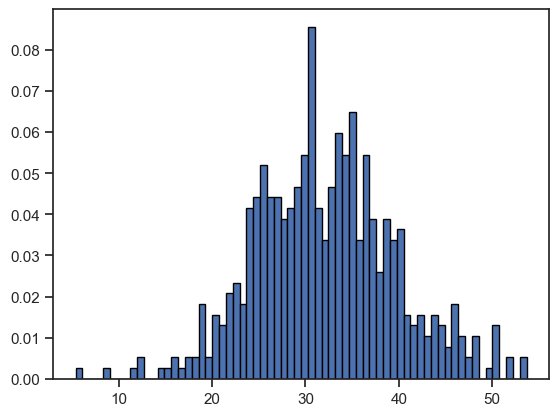

In [40]:
paid.reset_index()
plt.hist(paid, bins=66,density=True, edgecolor='black')

In [41]:
# driver cost = what drivers accepted for pay
paid.describe()

,PAY
count,527.000000
mean,32.076048
std,7.539845
min,5.403973
25%,26.767627
50%,31.686306
75%,36.810070
max,53.667563


In [42]:
# most frequently accepted pay for drivers, NO REPEATS, Showing tail of lowest payments

FreqPaid = DataFrame(paid.groupby('PAY').size().to_frame('PRICE FREQ')).reset_index()

FreqPaid.sort_values(by=['PAY','PRICE FREQ'],ascending=False).tail(33)

 

,PAY,PRICE FREQ
32,21.340502,1
31,21.163831,1
30,21.057217,1
29,20.971489,1
28,20.712009,1
27,20.627901,1
26,20.543266,1
25,20.344283,1
24,20.237659,1
23,20.157597,1


In [43]:
# 50% of the time charge $31
# build a model for 12 months
# fit a model to see if we can predict the price and acceptance
# Price for Accepted rides
reject = DataFrame(df_train.loc[df_train['ACCEPTED'] == 0, 'PAY'])
reject.shape


(473, 1)

In [44]:
reject.describe()

,PAY
count,473.000000
mean,18.624636
std,7.411038
min,0.000000
25%,13.712670
50%,19.044601
75%,23.397230
max,43.154819


(array([0.02586685, 0.00323336, 0.00323336, 0.        , 0.        ,
        0.00970007, 0.00323336, 0.01293342, 0.00646671, 0.01616678,
        0.01616678, 0.01940013, 0.01293342, 0.02586685, 0.03233356,
        0.01940013, 0.04203363, 0.01616678, 0.04203363, 0.03233356,
        0.04526698, 0.05173369, 0.04850034, 0.03880027, 0.04850034,
        0.05173369, 0.03233356, 0.04203363, 0.06466712, 0.04203363,
        0.05496705, 0.08083389, 0.06143376, 0.04526698, 0.0582004 ,
        0.06466712, 0.03556691, 0.05173369, 0.03233356, 0.03556691,
        0.02586685, 0.01293342, 0.01940013, 0.01616678, 0.0291002 ,
        0.00323336, 0.02586685, 0.01293342, 0.01616678, 0.00970007,
        0.        , 0.00323336, 0.00323336, 0.        , 0.00323336,
        0.        , 0.00646671, 0.00646671, 0.00323336, 0.        ,
        0.        , 0.00323336, 0.        , 0.        , 0.        ,
        0.00323336]),
 array([ 0.        ,  0.65386089,  1.30772178,  1.96158267,  2.61544357,
         3.26930446, 

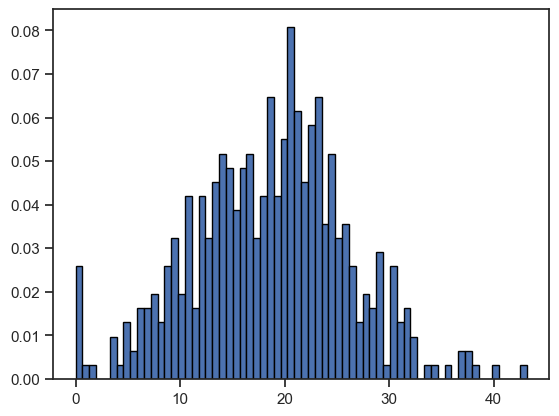

In [45]:
reject.reset_index()
plt.hist(reject, bins=66,density=True, edgecolor='black')

In [46]:
# model accepted and rejected rides to push a price to drivers that is beneficial to company

X = df_train.drop(columns='ACCEPTED')
y = df_train.ACCEPTED

from sklearn.model_selection import train_test_split

# For the larger the dataset, the smaller the test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# test size 50% 


In [47]:
list(X_train.columns)

['PAY']

In [48]:

X_train.shape

(500, 1)

In [49]:
X_train.head(6)

,PAY
680,35.091481
177,11.990865
395,18.640873
911,24.465878
793,5.403973
960,33.685332


In [50]:
y_train.shape

(500,)

In [51]:

# import libraries for metrics and reporting
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve


def model_metrics(y_true, y_hypothesis, test='test data'): 
    print("metrics using {} ...".format(test))
    print('Mean Abs Error   MAE    : ', mean_absolute_error(y_true, y_hypothesis))
    print('Mean Sq  Error MSE      : ', mean_squared_error(y_true, y_hypothesis))
    print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_true, y_hypothesis)))
    print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)
    print('r2 value                : ', r2_score(y_true, y_hypothesis))

    print('\n')





In [52]:
#predict (training samples)
import sklearn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [53]:
# LINEAR REGRESSION MODEL
#fit the data
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_train)
model_metrics(y_train, y_pred, 'training data')


metrics using training data ...
Mean Abs Error   MAE    :  0.30801811531080237
Mean Sq  Error MSE      :  0.13483768319675046
Root Mean Sq Error RMSE :  0.3672025097909197
MAPE                    :  inf
MPE                     :  nan
r2 value                :  0.45751587892969603




In [54]:
#predict (testing samples)
y_pred = linreg.predict(X_test)
model_metrics(y_test, y_pred, 'test data')

metrics using test data ...
Mean Abs Error   MAE    :  0.31277684109743914
Mean Sq  Error MSE      :  0.1414814394105547
Root Mean Sq Error RMSE :  0.37614018584904574
MAPE                    :  inf
MPE                     :  nan
r2 value                :  0.4334941403575071




In [55]:
# 62% R squared not a good fit.
# Run cross validation metrics

# K FOLDS Model


#import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kf = KFold(n_splits=7, shuffle=True, random_state=42)

%time
scoring = {'r2':'r2',
           'MSE': 'neg_mean_squared_error'}

#instantiate the lin reg model
linreg = LinearRegression()

scores = cross_validate(estimator=linreg,
                        X=X_train,
                        y=y_train,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True)

#print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))
print('Training MSE: {}'.format(scores['train_MSE'].mean()))
print('Testing MSE: {}'.format(scores['test_MSE'].mean()))

#High dimensionality
#Multi-collinearity

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
Training r2 : 0.4576432676619112
Testing r2 : 0.4490724691480219
Training MSE: -0.13477564844332998
Testing MSE: -0.13564367462002141


In [56]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [1,5,10], 'learning_rate': [0.13,0.26,0.29], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.09656103 0.33844848 0.4416284  0.10437973 0.36928305 0.46785077
 0.10649029 0.36502818 0.45267621 0.19407537 0.45009584 0.49688615
 0.20862338 0.47364513 0.4915597  0.21205567 0.46101068 0.47546677
 0.21419757 0.46100888 0.50115334 0.23014378 0.48095049 0.48627146
 0.23376906 0.468467   0.4745031 ]
Grid best parameter (max. accuracy):  {'learning_rate': 0.29, 'max_depth': 1, 'n_estimators': 10}
Grid best score (accuracy):  0.501153341063814
CPU times: user 7.13 s, sys: 981 ms, total: 8.11 s
Wall time: 5.88 s


In [57]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [13,26,33], 'learning_rate': [0.13,0.26,0.29], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.46546678 0.49969897 0.50189571 0.48691152 0.49115831 0.49166981
 0.47119204 0.46728131 0.46510064 0.50188499 0.50204357 0.50161118
 0.49014739 0.48514008 0.47797527 0.473016   0.45488231 0.44241262
 0.50310274 0.5024838  0.50220662 0.48766569 0.48080701 0.46790208
 0.47279733 0.44497121 0.43385445]
Grid best parameter (max. accuracy):  {'learning_rate': 0.29, 'max_depth': 1, 'n_estimators': 13}
Grid best score (accuracy):  0.5031027432928588
CPU times: user 13.9 s, sys: 1.33 s, total: 15.3 s
Wall time: 7.51 s


In [58]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [33,66,99], 'learning_rate': [0.13,0.26,0.29], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.50189571 0.50098458 0.49985437 0.49166981 0.47938445 0.45557961
 0.46510064 0.43979393 0.416287   0.50161118 0.49931568 0.49764613
 0.47797527 0.44095846 0.40786398 0.44241262 0.38241038 0.33332918
 0.50220662 0.49997538 0.4979127  0.46790208 0.43196801 0.39416293
 0.43385445 0.3535357  0.29236561]
Grid best parameter (max. accuracy):  {'learning_rate': 0.29, 'max_depth': 1, 'n_estimators': 33}
Grid best score (accuracy):  0.502206621479138
CPU times: user 27.8 s, sys: 1.89 s, total: 29.6 s
Wall time: 11.4 s


In [59]:
# More EDA to be done. check for outliers we saw in bar chart
# Distributions only (for outliers, values further away from zero indicate more extreme outliers) 
paid = DataFrame(paid)
paid.skew().sort_values(ascending=False)

PAY    0.103526
dtype: float64

In [60]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [33,34,35], 'learning_rate': [0.13,0.26,0.29], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.50189571 0.50174778 0.50202735 0.49166981 0.49068289 0.49006579
 0.46510064 0.4648089  0.46511437 0.50161118 0.50157782 0.50121596
 0.47797527 0.47785461 0.4765894  0.44241262 0.44038385 0.43967827
 0.50220662 0.50204631 0.50180887 0.46790208 0.46708151 0.46668288
 0.43385445 0.43181255 0.42560398]
Grid best parameter (max. accuracy):  {'learning_rate': 0.29, 'max_depth': 1, 'n_estimators': 33}
Grid best score (accuracy):  0.502206621479138
CPU times: user 17.5 s, sys: 1.65 s, total: 19.1 s
Wall time: 6.43 s


In [61]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [31,32,33], 'learning_rate': [0.13,0.26,0.29], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.50158523 0.50165702 0.50189571 0.49214007 0.49214711 0.49166981
 0.46662655 0.46617741 0.46510064 0.50183363 0.50187001 0.50161118
 0.48113804 0.48078507 0.47797527 0.44598711 0.44474445 0.44241262
 0.50213016 0.50243123 0.50220662 0.47518066 0.47023788 0.46790208
 0.43834259 0.43799922 0.43385445]
Grid best parameter (max. accuracy):  {'learning_rate': 0.29, 'max_depth': 1, 'n_estimators': 32}
Grid best score (accuracy):  0.5024312254966868
CPU times: user 16.1 s, sys: 1.84 s, total: 18 s
Wall time: 9.93 s


In [62]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [31,32,33], 'learning_rate': [0.28,0.29,0.30], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.50244659 0.50244707 0.50197162 0.47731372 0.47447129 0.47354852
 0.44139136 0.43991626 0.43800516 0.50213016 0.50243123 0.50220662
 0.47518066 0.47023788 0.46790208 0.43834259 0.43799922 0.43385445
 0.50290267 0.50234171 0.50254726 0.46685405 0.4649318  0.46027651
 0.4400588  0.43394466 0.433295  ]
Grid best parameter (max. accuracy):  {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 31}
Grid best score (accuracy):  0.5029026680134889
CPU times: user 17.3 s, sys: 979 ms, total: 18.3 s
Wall time: 8.32 s


In [63]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [33,36,39], 'learning_rate': [0.28,0.29,0.30], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)


Mean score matrix:  [0.50197162 0.50190884 0.50191555 0.47354852 0.46789806 0.4663625
 0.43800516 0.43301649 0.42929248 0.50220662 0.50189441 0.50183089
 0.46790208 0.46561756 0.45994994 0.43385445 0.42330824 0.41774865
 0.50254726 0.50184782 0.5022564  0.46027651 0.45726567 0.45613747
 0.433295   0.43159805 0.43294518]
Grid best parameter (max. accuracy):  {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 33}
Grid best score (accuracy):  0.5025472644549527
CPU times: user 17.7 s, sys: 1.87 s, total: 19.6 s
Wall time: 14.4 s


In [64]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [32,33,34], 'learning_rate': [0.26,0.27,0.28], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)


Mean score matrix:  [0.50187001 0.50161118 0.50157782 0.48078507 0.47797527 0.47785461
 0.44474445 0.44241262 0.44038385 0.50109357 0.50133096 0.50067698
 0.47646631 0.47418271 0.47147906 0.44760694 0.44473827 0.44238818
 0.50244707 0.50197162 0.50219051 0.47447129 0.47354852 0.47244512
 0.43991626 0.43800516 0.43700143]
Grid best parameter (max. accuracy):  {'learning_rate': 0.28, 'max_depth': 1, 'n_estimators': 32}
Grid best score (accuracy):  0.5024470746398231
CPU times: user 17.9 s, sys: 1.33 s, total: 19.2 s
Wall time: 6.54 s


In [65]:
from sklearn.linear_model import PoissonRegressor
preg = PoissonRegressor()
preg.fit(X_train,y_train)

y_pred = preg.predict(X_train)
model_metrics(y_train, y_pred, 'training data')


metrics using training data ...
Mean Abs Error   MAE    :  0.35784709715803864
Mean Sq  Error MSE      :  0.16766713881517165
Root Mean Sq Error RMSE :  0.4094717802427557
MAPE                    :  inf
MPE                     :  -inf
r2 value                :  0.3254351582131525




In [66]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [6,33,34], 'learning_rate': [0.26,0.27,0.28], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)


Mean score matrix:  [0.46722178 0.50161118 0.50157782 0.48439206 0.47797527 0.47785461
 0.4720589  0.44241262 0.44038385 0.46819323 0.50133096 0.50067698
 0.48629415 0.47418271 0.47147906 0.4759099  0.44473827 0.44238818
 0.47322403 0.50197162 0.50219051 0.48942318 0.47354852 0.47244512
 0.47471854 0.43800516 0.43700143]
Grid best parameter (max. accuracy):  {'learning_rate': 0.28, 'max_depth': 1, 'n_estimators': 34}
Grid best score (accuracy):  0.5021905126226771
CPU times: user 13.2 s, sys: 1.71 s, total: 14.9 s
Wall time: 11.3 s


(array([0.13111111, 0.28444444, 0.32555556, 0.2       , 0.10888889,
        0.03777778, 0.01666667, 0.00555556, 0.        , 0.00111111]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

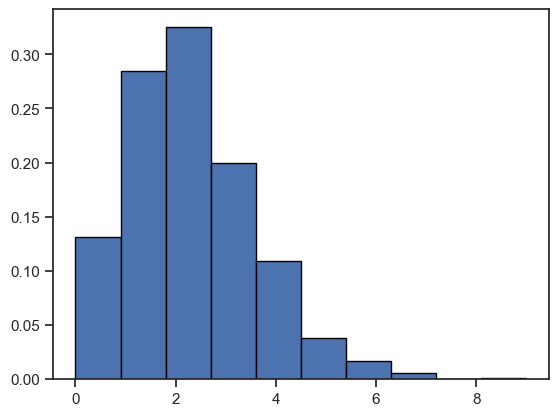

In [256]:
# distribution of getting rides for each 10000 riders in the first month
from scipy.stats import poisson
import matplotlib.pyplot as plt

#generate Poisson distribution with sample size 10000
x = poisson.rvs(mu=2, size=1000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

In [294]:
# import numpy as np

#polynomial fit with degree = 10
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


LinearRegression()

In [295]:
y_pred = pol_reg.predict(X_poly)
model_metrics(y_train, y_pred, 'training data')


metrics using training data ...
Mean Abs Error   MAE    :  0.24893763758442666
Mean Sq  Error MSE      :  0.12386715720326265
Root Mean Sq Error RMSE :  0.35194766259099186
MAPE                    :  inf
MPE                     :  nan
r2 value                :  0.5032895951748866




In [297]:
X_poly_test = poly_reg.fit_transform(X_test)
y_pred = pol_reg.predict(X_poly_test)
model_metrics(y_test, y_pred, 'training data')

metrics using training data ...
Mean Abs Error   MAE    :  0.2539846689774651
Mean Sq  Error MSE      :  0.12596114943652414
Root Mean Sq Error RMSE :  0.3549100582352156
MAPE                    :  inf
MPE                     :  nan
r2 value                :  0.493674406847456




In [296]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [6,33,66], 'learning_rate': [0.1,0.2,0.3], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_poly, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)


Mean score matrix:  [0.30666982 0.48439587 0.48814516 0.34491321 0.48217212 0.47966601
 0.34791293 0.47822893 0.46779538 0.41682837 0.48695966 0.48547587
 0.45356264 0.48109812 0.468001   0.45292452 0.46323633 0.44268838
 0.46221557 0.48631111 0.4845685  0.47725598 0.47074785 0.46425574
 0.47634613 0.45702939 0.4256818 ]
Grid best parameter (max. accuracy):  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 66}
Grid best score (accuracy):  0.48814516253445966
CPU times: user 20.5 s, sys: 387 ms, total: 20.9 s
Wall time: 6.08 s


In [285]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit on training set only.
X_poly_sc = sc.fit_transform(X_poly) # Apply transform to both the training set and the test set.
# sc_t.fit(y_test)

In [286]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [6,33,66], 'learning_rate': [0.13,0.26,0.28], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_poly_sc, y_train)

print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)


Mean score matrix:  [0.35395611 0.48701719 0.48753912 0.39276994 0.48436136 0.47674595
 0.39438978 0.47348897 0.45887662 0.45194821 0.48766622 0.48603656
 0.47382602 0.47634507 0.46577122 0.46975855 0.45431732 0.4335893
 0.45904471 0.48859586 0.48666954 0.476805   0.47249022 0.45945746
 0.47197386 0.45474051 0.42880295]
Grid best parameter (max. accuracy):  {'learning_rate': 0.28, 'max_depth': 1, 'n_estimators': 33}
Grid best score (accuracy):  0.4885958608731717
CPU times: user 23.6 s, sys: 545 ms, total: 24.1 s
Wall time: 6.6 s


In [287]:
y_pred = pol_reg.predict(X_poly_sc)
model_metrics(y_train, y_pred, 'training data')


metrics using training data ...
Mean Abs Error   MAE    :  0.5243324854908362
Mean Sq  Error MSE      :  0.514067357168816
Root Mean Sq Error RMSE :  0.7169849072113136
MAPE                    :  inf
MPE                     :  -inf
r2 value                :  -1.0614229861406161




In [310]:
# entire 'real' data set
# polynomial fit with degree = 10
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [311]:
y_pred = pol_reg.predict(X_poly)
model_metrics(y, y_pred, 'training data')


metrics using training data ...
Mean Abs Error   MAE    :  0.2473810190213431
Mean Sq  Error MSE      :  0.12358521094339084
Root Mean Sq Error RMSE :  0.35154688299484443
MAPE                    :  inf
MPE                     :  nan
r2 value                :  0.5042134426251315




In [331]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [347]:
# Classification report
y_pred = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       242
           1       0.76      0.79      0.78       258

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



In [348]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.766


In [389]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=5)

In [390]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       242
           1       0.78      0.81      0.79       258

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500



In [391]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.782


In [385]:
#polynomial fit with degree = 10
# Fitting Polynomial Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree=10)
# X_poly = poly_reg.fit_transform(X_train)
# X_poly_test = poly_reg.transform(X_train)
# pol_reg = LinearRegression()
# pol_reg.fit(X_poly, y_train)


LinearRegression()

In [386]:
# Random forest model with polynomial fit
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators=600)
# rfc.fit(X_poly,y_train)


RandomForestClassifier(n_estimators=600)

In [387]:
# y_pred = rfc.predict(X_poly_test)
# from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49       242
           1       0.53      0.55      0.54       258

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



In [388]:
# Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.514


In [392]:
# Random forest model whole 'real' data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X,y)


RandomForestClassifier(n_estimators=5)

In [393]:
y_pred = rfc.predict(X)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       473
           1       0.96      0.96      0.96       527

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [395]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.958


In [397]:
# now we have a pricing prediction model, let's look at some likely prices
X.shape


(1000, 1)

In [398]:
X.sample(6)

,PAY
718,22.510434
721,29.782108
537,29.207524
858,20.485388
16,25.434022
138,36.219630


In [400]:
y_pred[30]

0

In [401]:
y_pred[31]

1

In [402]:
y_pred[32]

0

In [403]:
y_pred[33]

1

In [404]:
y_pred[34]

1

In [405]:
y_pred[35]

0

In [406]:
y_pred[36]

0

In [407]:
y_pred[37]

1

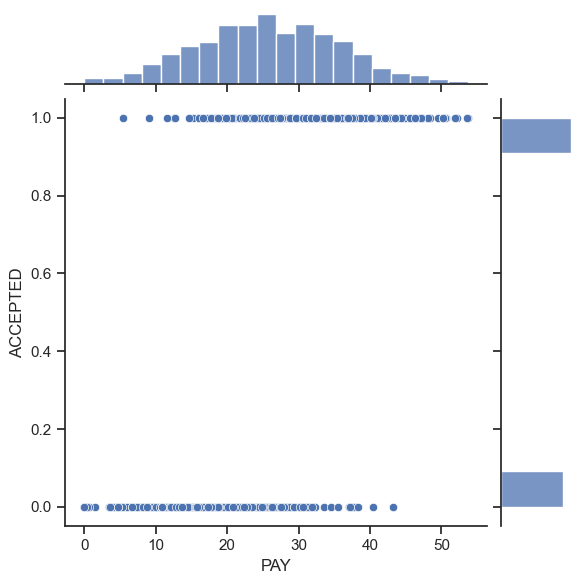

In [409]:
sns.jointplot(x=df_train['PAY'], y= df_train['ACCEPTED'],data=df_train) #two ditribution

<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

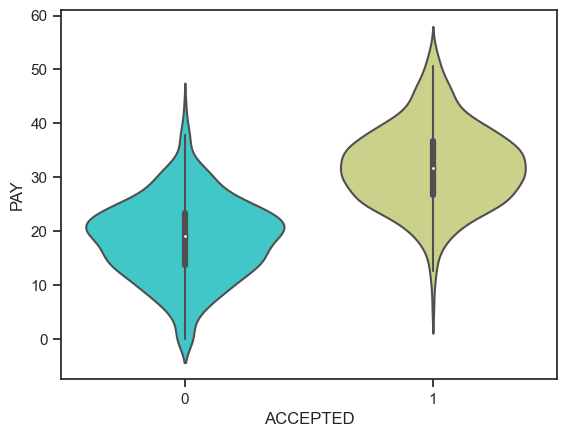

In [413]:
sns.violinplot(x=df_train['ACCEPTED'], y=df_train['PAY'],data=df_train,palette='rainbow')

In [414]:
y_pred[21]

0

In [415]:
y_pred[22]

0

In [416]:
y_pred[23]

1

In [417]:
y_pred[24]

1

In [418]:
y_pred[25]

0

In [419]:
y_pred[26]

1

In [420]:
y_pred[27]

0

In [421]:
y_pred[28]

1

In [422]:
y_pred[20]

1

<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

/Users/User/venv/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


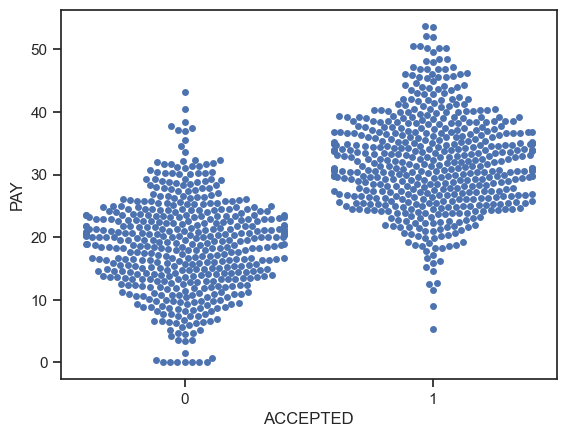

In [423]:
sns.swarmplot(x=df_train['ACCEPTED'], y=df_train['PAY'],data=df_train)

In [458]:
# find rewards for rides accepted > 1, i.e. 2,3,4,5,6
# distribution of getting rides for each 1000 riders in the first month


<IPython.core.display.Javascript object>


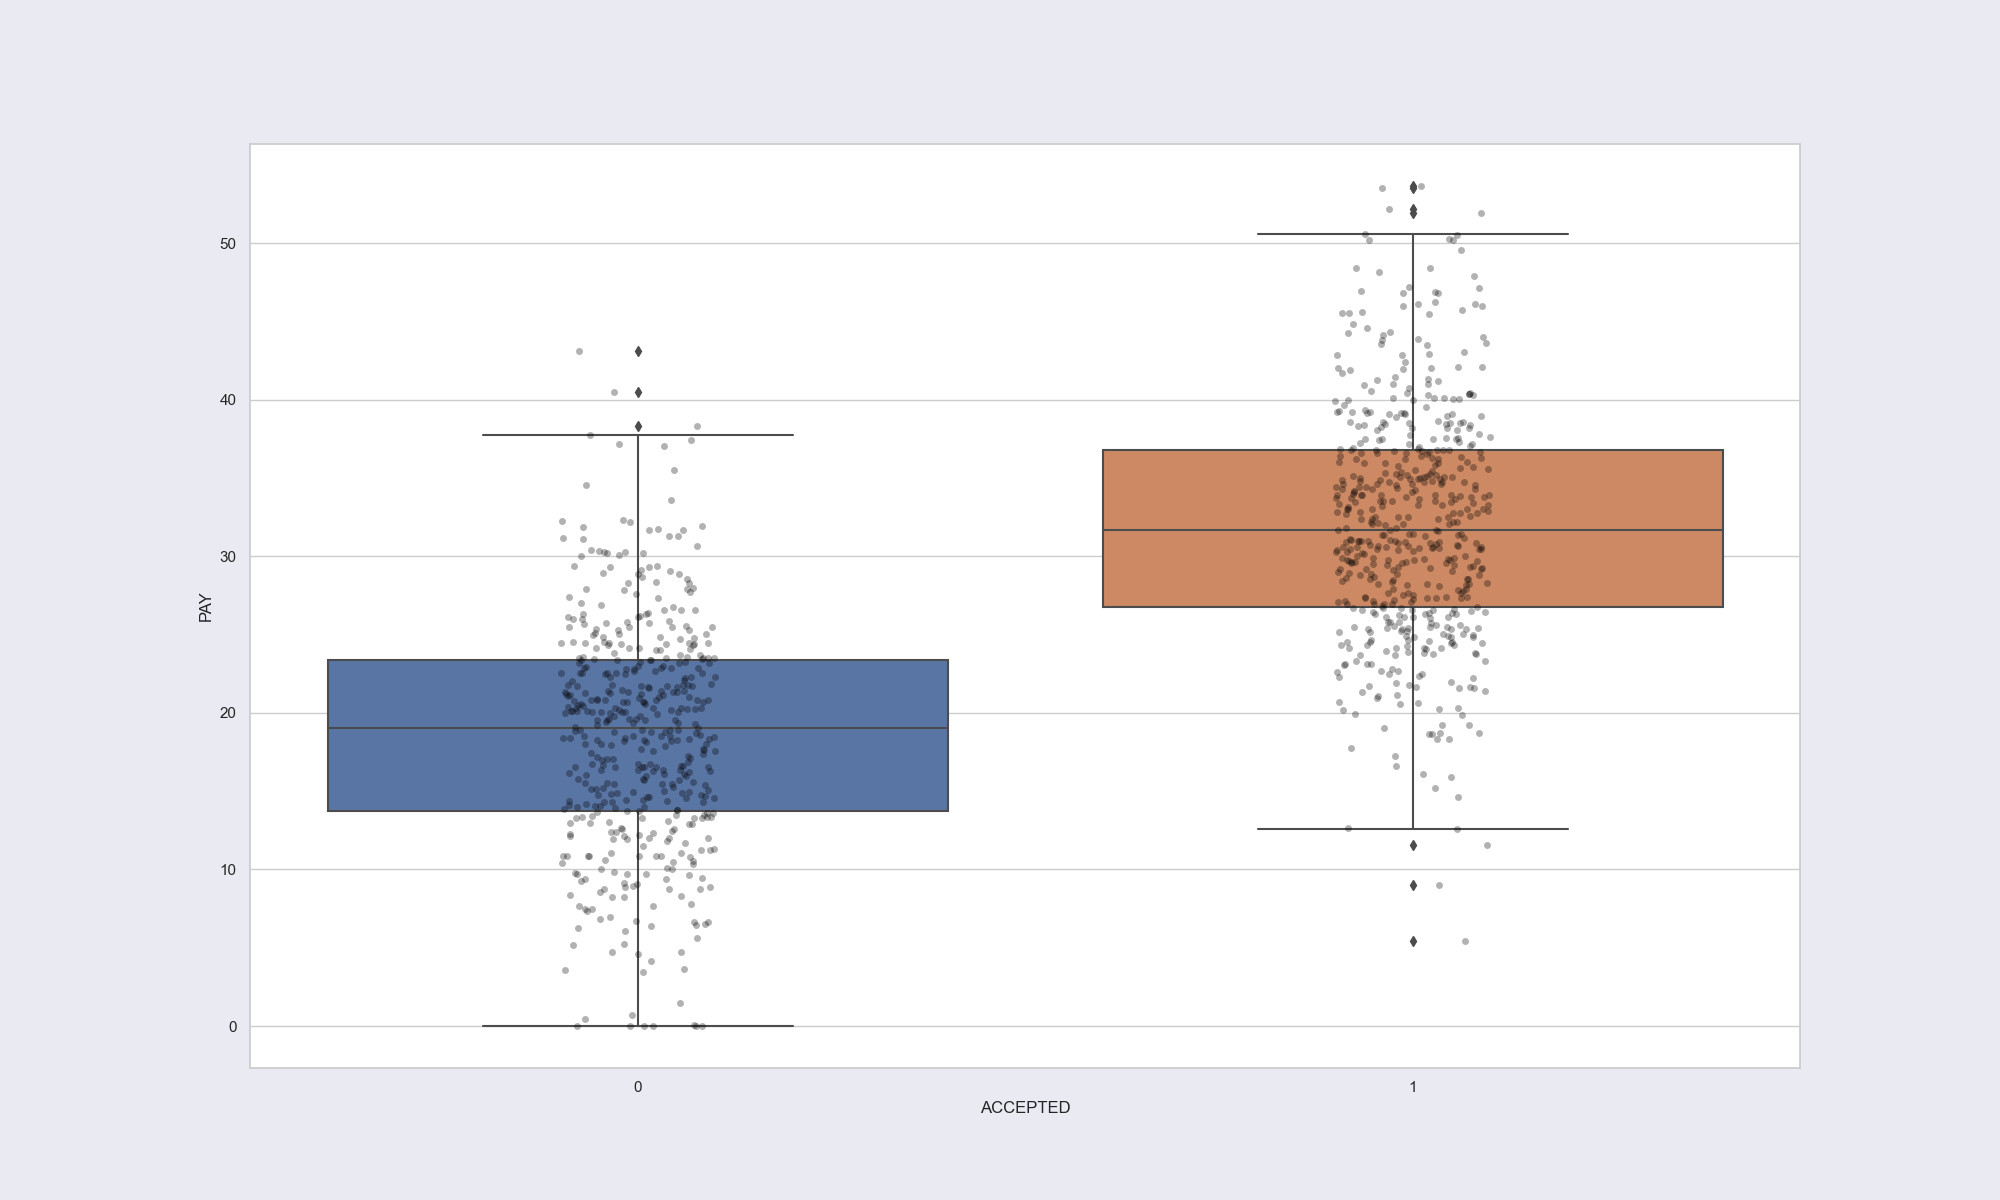

In [461]:
df = pd.DataFrame(data=df_train, columns=['ACCEPTED','PAY'])
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 12), facecolor=facecolor)

sns.boxplot(x=df['ACCEPTED'], y=df['PAY'], data=df, )
sns.stripplot(x=df['ACCEPTED'], y=df['PAY'], data=df, marker="o", alpha=0.3, color="black", order=["0","1"])

boxplot.axes.set_title("Distribution of Rejected and Accepted Driver Price", fontsize=16)
boxplot.set_xlabel("Rejected or Accepted", fontsize=14)
boxplot.set_ylabel("Price in USD ($)", fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


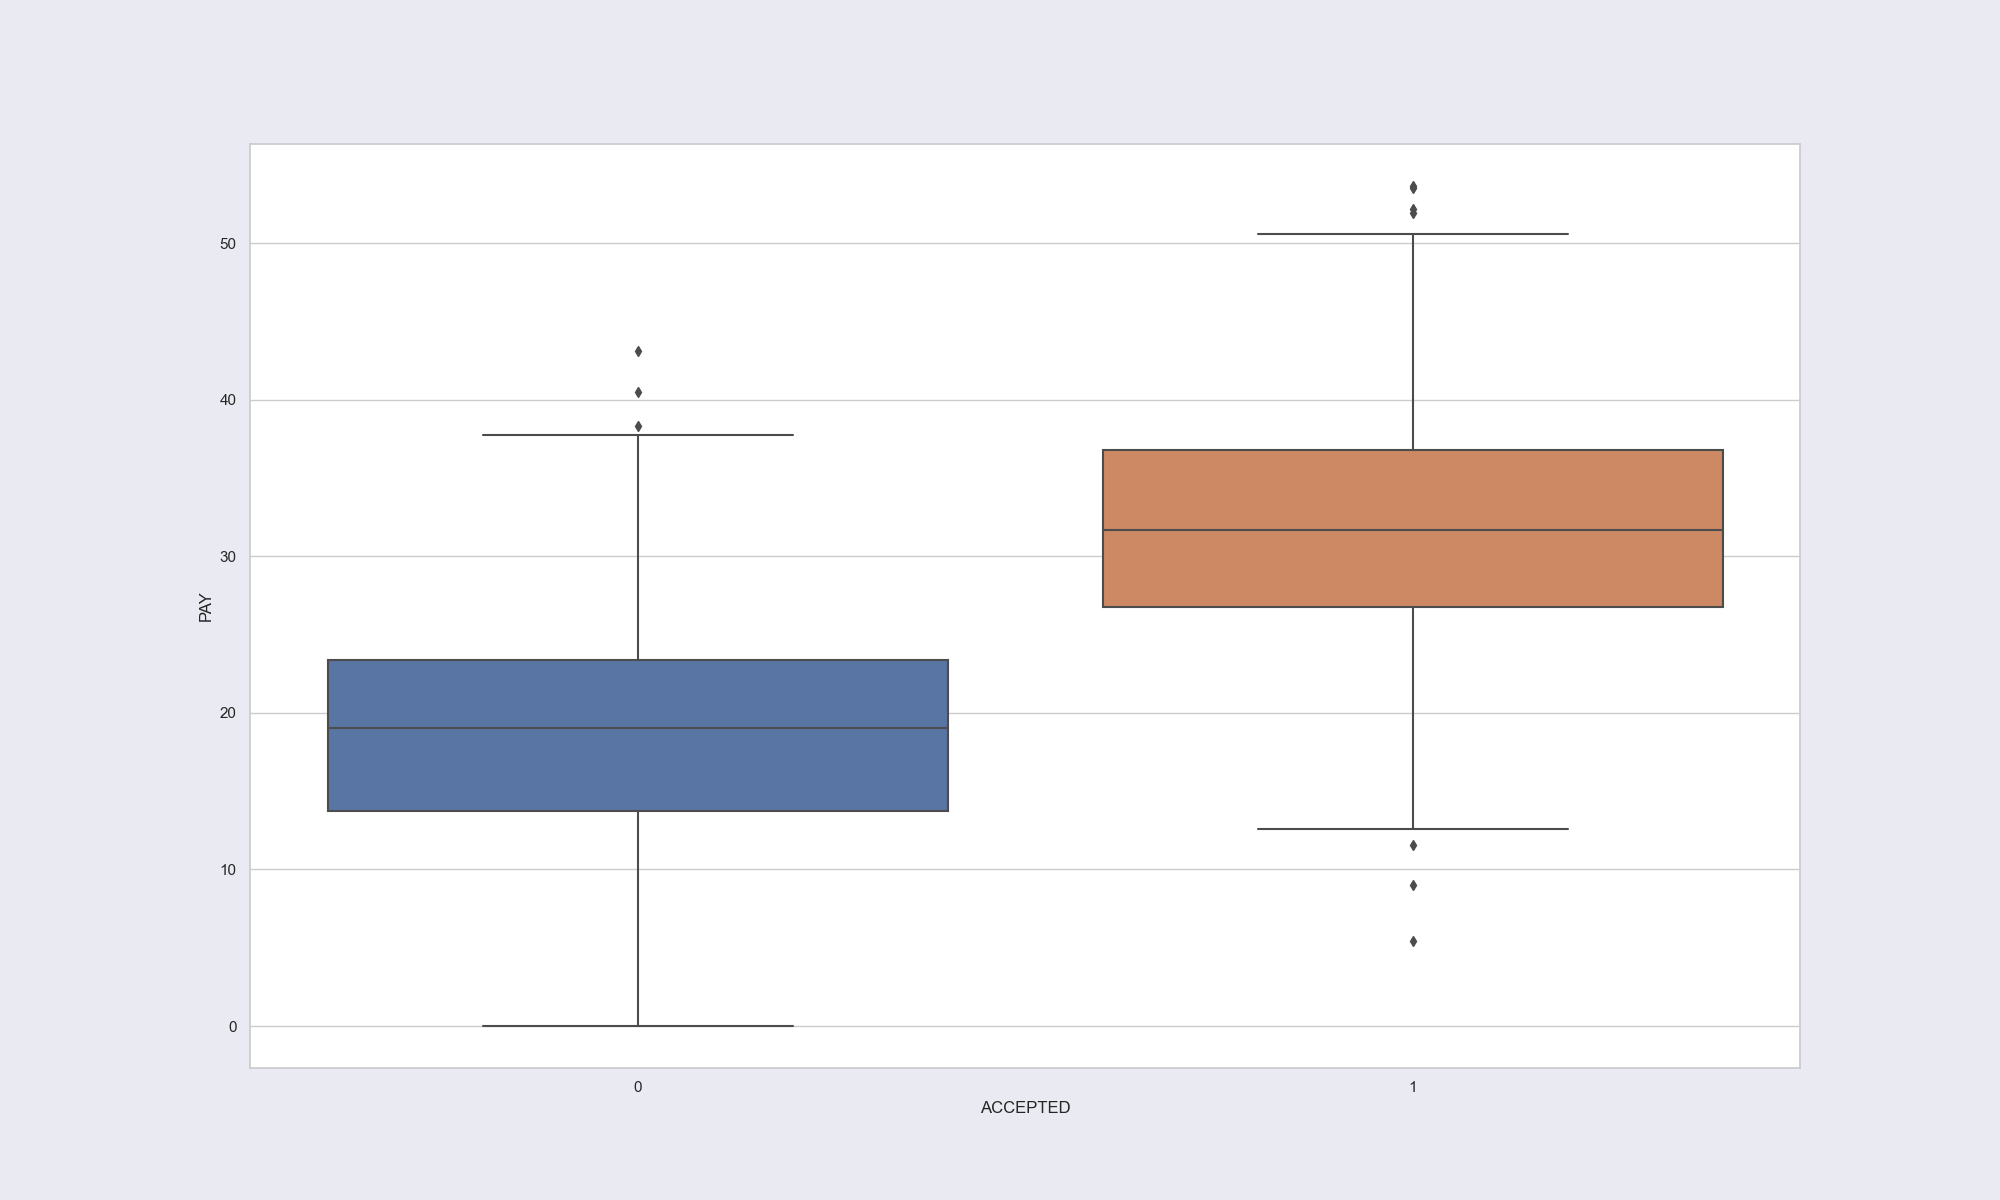

<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

In [460]:
df = pd.DataFrame(data=df_train, columns=['ACCEPTED','PAY'])
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 12), facecolor=facecolor)

sns.boxplot(x=df['ACCEPTED'], y=df['PAY'], data=df, )

<IPython.core.display.Javascript object>


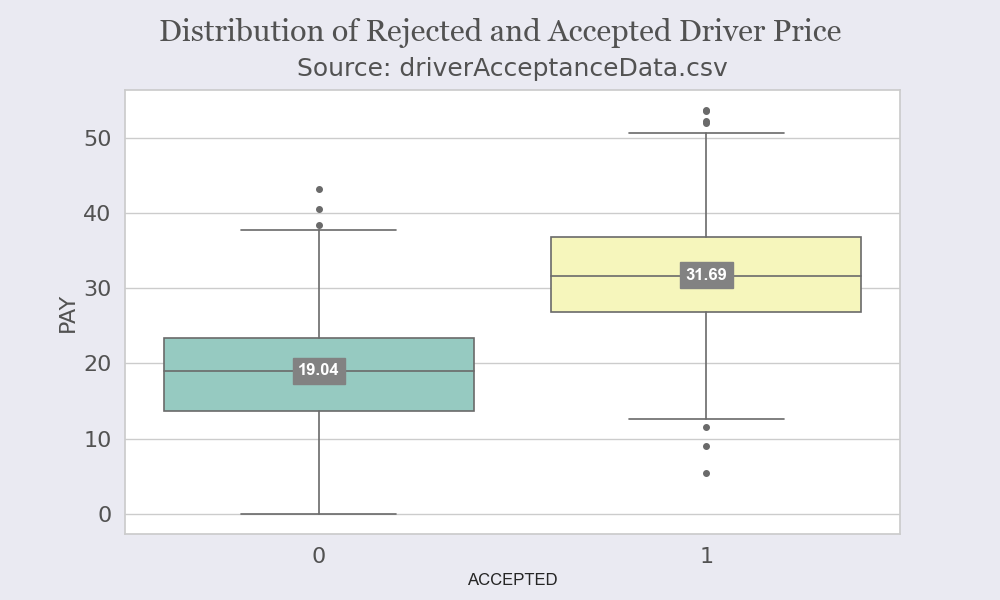

In [463]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

df = pd.DataFrame(data=df_train, columns=['ACCEPTED','PAY'])
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

ax = sns.boxplot(x=df['ACCEPTED'], y=df['PAY'], data=df, 
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 flierprops=dict(marker='o', markersize=4))

font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}

ax.set_ylabel('PAY', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
title = 'Distribution of Rejected and Accepted Driver Price'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = 'Source: driverAcceptanceData.csv'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
    
            
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
    
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],2) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='semibold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
    )
 

In [98]:
# loop for generating poisson counts on riders hailing during the first year, 12 month iterations
# month count
# Do this (new version)
from numpy.random import default_rng
rng = default_rng()
i = 1
# rider pool start
a,b,c,d,e,f,g = 0,0,0,0,0,0,0
income_sum, income_sum_a = 0,0
charge_rider = 30
cost_acq = charge_rider*1000
acc_rate = 1.0 # to be updated for modeling and pricing strategy


# income for month 1__________________


# instances of ride requests based on poison model
# lambda = 1 group, start by only hiring 1000 riders for a 12 month period

df_(for a in range f) = DataFrame( rng.poisson(1,1000), np.arange(0, 1000))
# change name from 'size' to 'RideCount'
df_a.rename( columns={0:'NumRides'}, inplace=True )
numriders_a = DataFrame(df_a.groupby('NumRides').size().to_frame('RideCount')).reset_index()

print("Number of riders month ",i) 
print(numriders_a)

# first year hire a 1000 riders at a cost of $30/rider
# cost of $30000 for the first year for acquisition of riders



# while i < 13: # wait to loop till construct full calendar year
    
    # acquire riders
    # cost_sum+=charge_rider*(1000-a)
    
# count of dropped riders
a += numriders.iloc[0].RideCount
# count of lamda = numriders.iloc[1].NumRides, or always 1?
b += numriders.iloc[1].RideCount
# count of lamda = numriders.iloc[2].NumRides, or always 2?
c += numriders.iloc[2].RideCount
# count of lamda = numriders.iloc[3].NumRides, or always 3?
d += numriders.iloc[3].RideCount
# count of lamda = numriders.iloc[4].NumRides
e += numriders.iloc[4].RideCount
# count of lamda = numriders.iloc[5].NumRides
f += numriders.iloc[5].RideCount
# assumption, based  on 0.527 match to accepted rate based on driver

for g in range(len(numriders_a.index)):
 income_sum += numriders_a.iloc[g].NumRides*charge_rider*numriders_a.iloc[g].RideCount*acc_rate
      
# 

print("Income from month ",i)    
print(income_sum)
    # create plot of Poisson distribution
    # plt.hist(x, density=True, edgecolor='black')
i += 1

# income for month 2__________________

# Do we make lambda (n-1) like e.g. a rider requests 3 rides but only 2 were matched/accepted by driver?


for x in range(12):
    
# count of lamda = numriders.iloc[1].NumRides, or always 1?
    df_b = DataFrame( rng.poisson(numriders.iloc[1].NumRides, b), np.arange(0, b))
    df_b.rename( columns={0:'NumRides'}, inplace=True )
    numriders_b = DataFrame(df_b.groupby('NumRides').size().to_frame('RideCount')).reset_index()
    
    print("Number of riders month ",i) 
    print(numriders_b)

    for g in range(len(numriders_b.index)):
    income_sum_a += numriders_b.iloc[g].NumRides*charge_rider*numriders_b.iloc[g].RideCount

    print(income_sum_a)

    df_c = DataFrame( rng.poisson(numriders.iloc[2].NumRides, c), np.arange(0, c))
    df_c.rename( columns={0:'NumRides'}, inplace=True )
    numriders_c = DataFrame(df_c.groupby('NumRides').size().to_frame('RideCount')).reset_index()

    print("Number of riders month ",i) 
    print(numriders_c)

    for g in range(len(numriders_c.index)):
    income_sum_a += numriders_c.iloc[g].NumRides*charge_rider*numriders_c.iloc[g].RideCount

    print(income_sum_a)
    
    df_d = DataFrame( rng.poisson(numriders.iloc[3].NumRides, d), np.arange(0, d))
    df_d.rename( columns={0:'NumRides'}, inplace=True )
    numriders_d = DataFrame(df_d.groupby('NumRides').size().to_frame('RideCount')).reset_index()

    print("Number of riders month ",i) 
    print(numriders_d)

    for g in range(len(numriders_d.index)):
    income_sum_a += numriders_d.iloc[g].NumRides*charge_rider*numriders_d.iloc[g].RideCount

    print(income_sum_a)
    
    df_e = DataFrame( rng.poisson(numriders.iloc[4].NumRides, e), np.arange(0, e))
    df_e.rename( columns={0:'NumRides'}, inplace=True )
    numriders_e = DataFrame(df_e.groupby('NumRides').size().to_frame('RideCount')).reset_index()

    print("Number of riders month ",i) 
    print(numriders_e)

    for g in range(len(numriders_e.index)):
    income_sum_a += numriders_e.iloc[g].NumRides*charge_rider*numriders_e.iloc[g].RideCount

    print(income_sum_a)

    df_f = DataFrame( rng.poisson(numriders.iloc[5].NumRides, f), np.arange(0, f))
    df_f.rename( columns={0:'NumRides'}, inplace=True )
    numriders_f = DataFrame(df_f.groupby('NumRides').size().to_frame('RideCount')).reset_index()

    print("Number of riders month ",i) 
    print(numriders_f)

    for g in range(len(numriders_f.index)):
    income_sum_a += numriders_f.iloc[g].NumRides*charge_rider*numriders_f.iloc[g].RideCount

    print("Income from month ",i)    
    print(income_sum_a)
    i += 1

# income for month 3__________________


# income for month 4

# income for month 5

# income for month 6

# income for month 7

# income for month 8

# income for month 9

# income for month 10

# income for month 11

# income for month 12




Number of riders month  1
   NumRides  RideCount
0         0        360
1         1        361
2         2        171
3         3         81
4         4         23
5         5          4
Income from month  1
31740
Number of riders month  2
   NumRides  RideCount
0         0        140
1         1        131
2         2         66
3         3         27
4         4          6
11040
Number of riders month  2
   NumRides  RideCount
0         0         27
1         1         47
2         2         51
3         3         32
4         4         18
5         5         12
6         6          1
7         7          3
23160
Number of riders month  2
   NumRides  RideCount
0         0          3
1         1          3
2         2         15
3         3         13
4         4         11
5         5          6
6         6          3
7         7          1
8        10          1
28590
Number of riders month  2
   NumRides  RideCount
0         2          1
1         3          4
2         4         

In [1]:
df_(for a in range f) = DataFrame( rng.poisson(1,1000), np.arange(0, 1000))

SyntaxError: invalid syntax (1348513375.py, line 1)

In [93]:
print(numriders_a)

   NumRides  RideCount
0         0        345
1         1        369
2         2        187
3         3         76
4         4         21
5         6          2


In [71]:
df_a = DataFrame( poisson.rvs(mu=1, size=1000), np.arange(0, 1000))

In [72]:
df_a.head(13)

,0
0,2
1,0
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,1


(array([0.722, 0.   , 0.75 , 0.   , 0.364, 0.   , 0.124, 0.   , 0.038,
        0.002]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

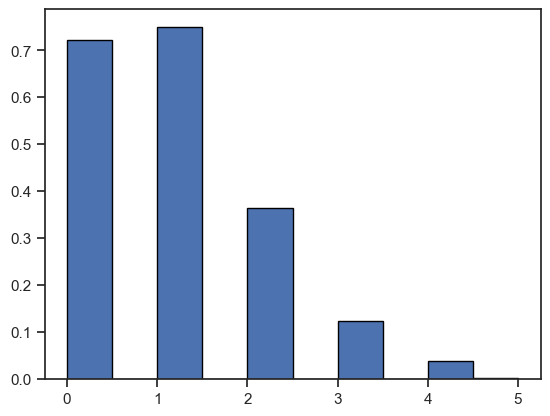

In [73]:
plt.hist(df_a, density=True, edgecolor='black')